In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D

In [2]:
np.random.seed(0)
colors = ('indianred','darkorange','gold','lime','turquoise','royalblue','blueviolet','magenta')
%matplotlib notebook

In [3]:
data_file = pd.HDFStore('/opt/DATA/train_test_arrays.h5').root.test_array.read()
x_test_array = data_file['x']
y_test_array = data_file['y']
test_array = pd.DataFrame({'x': x_test_array.tolist(), 'y': y_test_array.tolist()})

In [4]:
data_file = pd.HDFStore('/opt/DATA/analyse.h5')
data = data_file.root.data.read()
data_file.close()

In [5]:
dimension = data['dimension']
eigvals_imag = data['eigvals_imag']
eigvals_real = data['eigvals_real']
eigvals = eigvals_real+1j*eigvals_imag
min_q = data['min_q']
q_type = data['q_type']
random_seed = data['random_seed']
time_delay = data['time_delay']
converges = data['converges']
train_output = data['train_output']
max_cov_val = data['max_cov_val']
max_cov_delay = data['max_cov_delay']
anal_data = pd.DataFrame({'random_seed': random_seed.tolist(), 'time_delay': time_delay.tolist(),
                          'dimension': dimension.tolist(), 'min_q': min_q.tolist(), 'q_type': q_type.tolist(),
                          'eigvals': eigvals.tolist(), 'converges': converges.tolist(),
                          'train_output': train_output.tolist(), 'max_cov_val': max_cov_val.tolist(),
                          'max_cov_delay': max_cov_delay.tolist()})
anal_data

,converges,dimension,eigvals,max_cov_delay,max_cov_val,min_q,q_type,random_seed,time_delay,train_output
0,True,3.227935,"[(1.1540460257965985+0j), (1.1270614856699106+...","[[4, 0, 1, 0, 5, 1, -118, 0, 0, 0, 3, -118, 1,...","[[0.7901352072094524, 0.7945194704573014, -0.9...","[[0.16432773246948768, 0.2608994400525603, -0....","[0, 1, 0, 1, 1, 1, 1, 0, 2, 1, 0, 1, 0, 0, 1, ...",0,0,"[[[0.1656748264396511, 0.017228854313392508, 0..."
1,True,3.194256,"[(1.2747522691672935+0j), (1.2217198597639638+...","[[1, 0, 1, 1, 3, 1, -118, 1, 0, 0, 2, 1, 1, 1,...","[[0.8268259799834053, 0.7581506253657457, -0.8...","[[-0.06211256381549106, 0.05023516219218866, 0...","[1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, ...",0,1,"[[[0.06523489189759803, 0.014724699247744714, ..."
2,True,3.229835,"[(1.3504912641272158+0j), (1.3237061306041376+...","[[3, 0, 2, 1, 3, 3, 1, 2, 1, 1, 3, -116, 2, 0,...","[[0.31534663251544903, 0.1149694895370347, -0....","[[-0.5772679399842617, 0.2404038364677451, 0.6...","[0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, ...",0,2,"[[[0.20535273004852067, 0.044902392732179885, ..."
3,True,3.297288,"[(1.4043890030534754+0j), (1.3908810302006596+...","[[3, 3, 2, 1, 4, -98, -116, 4, 3, 3, 4, 2, -11...","[[0.8558729383590168, -0.614548638148952, -0.9...","[[0.29963539529630406, -0.09900615575696227, -...","[1, 1, 1, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, ...",0,3,"[[[0.245805140443457, 0.05050851116406479, 0.1..."
4,True,3.334671,"[(1.4371323892360983+0j), (1.3855462944615156+...","[[4, 6, 4, 3, 5, -104, -115, -116, -100, -117,...","[[0.8486183152545722, -0.09951498909377636, -0...","[[0.14469590515657238, 0.7063653827947121, -0....","[0, 1, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 0, 0, ...",0,4,"[[[0.06640446727433924, -0.0667317137075182, 0..."
5,True,3.314017,"[(1.5564330750853488+0.010485261658969099j), (...","[[6, 0, 5, -115, 2, 5, 3, 5, -98, -104, 6, 2, ...","[[0.235980517968844, 0.2070501859041766, -0.56...","[[0.798326057552592, 0.7358365532756307, -0.71...","[0, 1, 2, 1, 0, 2, 1, 2, 1, 1, 0, 1, 1, 2, 3, ...",0,5,"[[[-0.024766144786303488, -0.1401526686484974,..."
6,True,3.656740,"[(2.148431449070208+0j), (1.9869163167996249+0...","[[7, 5, 6, 4, 6, -97, 5, 3, 0, 7, 5, -115, 6, ...","[[0.11761256059796804, 0.9952881059077225, -0....","[[-0.08999996355324076, -0.2554027533111459, 0...","[2, 3, 1, 2, 1, 2, 2, 1, 1, 2, 0, 1, 1, 3, 0, ...",0,6,"[[[0.23197799379559103, 0.08094260123908639, 0..."
7,True,4.553862,"[(2.0552039665829103+0j), (1.985175092447547+0...","[[7, -112, -113, 3, 6, 6, 8, 6, 6, 4, 9, 5, 8,...","[[0.7953540150580023, 0.057548235012984665, -0...","[[0.3164596337694261, -0.6492973531758505, 0.6...","[3, 2, 3, 4, 4, 2, 2, 1, 3, 3, 0, 3, 1, 2, 2, ...",0,7,"[[[-0.050041262920981856, -0.06750184763198024..."
8,True,5.106004,"[(2.3172360034558883+0j), (2.1282939241729344+...","[[-111, 7, 5, 7, 3, 4, 6, 6, 3, -25, 9, 8, 8, ...","[[0.05756840711819814, 0.6308379763216398, 0.3...","[[0.9955354829031405, -0.7885178516810807, -0....","[6, 7, 5, 6, 6, 4, 5, 5, 6, 2, 2, 6, 2, 5, 4, ...",0,8,"[[[0.09211782497355836, -0.0016482079441051253..."
9,False,6.757802,"[(2.0435733819927324+0j), (1.9128642564805773+...","[[-80, -94, -69, 87, 3, 87, -84, 83, 100, 6, 9...","[[0.02950366582250012, 0.03151111602083726, -0...","[[-0.036063757810330964, -0.13655719905130564,...","[2, 3, 4, 3, 4, 3, 4, 4, 3, 3, 3, 4, 4, 3, 2, ...",0,9,"[[[-0.012468217605855873, -0.01124475941425918..."


In [13]:
anal_data[anal_data['time_delay']==8]

,converges,dimension,eigvals,max_cov_delay,max_cov_val,min_q,q_type,random_seed,time_delay,train_output
8,True,5.106004,"[(2.3172360034558883+0j), (2.1282939241729344+...","[[-111, 7, 5, 7, 3, 4, 6, 6, 3, -25, 9, 8, 8, ...","[[0.05756840711819814, 0.6308379763216398, 0.3...","[[0.9955354829031405, -0.7885178516810807, -0....","[6, 7, 5, 6, 6, 4, 5, 5, 6, 2, 2, 6, 2, 5, 4, ...",0,8,"[[[0.09211782497355836, -0.0016482079441051253..."
18,True,5.149625,"[(2.2166635124019987+0j), (2.141405258219453+0...","[[-111, 7, 2, 9, 8, 9, 11, 7, 4, 9, 4, 6, -95,...","[[0.05669496126640443, -0.9676429163055992, 0....","[[0.9932276572445661, -0.9815977639632194, 0.3...","[5, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3, 5, ...",1,8,"[[[0.04372770647074715, -0.04302289439901042, ..."
28,True,5.180651,"[(2.21845972591744+0j), (2.0789831003396784+0j...","[[8, -111, 5, 3, 2, 3, 4, 9, 6, -97, 8, 6, 10,...","[[-0.4554347744876905, 0.057743161424040616, 0...","[[0.5262504133694279, 0.9934086955014445, -0.8...","[1, 3, 3, 2, 2, 5, 3, 2, 2, 1, 2, 3, 1, 2, 1, ...",2,8,"[[[-0.0336304005314164, -0.008256561839391345,..."
38,True,4.165129,"[(1.9968589167665098+0j), (1.754639318694506+0...","[[8, -51, 8, 5, 15, -98, 8, 5, -101, 6, 4, 5, ...","[[0.43267180228921687, 0.05209217080058833, -0...","[[0.13114335793401632, -0.4845954091576648, -0...","[4, 1, 1, 2, 2, 2, 0, 2, 4, 3, 2, 2, 1, 5, 0, ...",3,8,"[[[0.06777934105464575, 0.0897896333569025, -0..."
48,False,4.659539,"[(2.178466978393125+0j), (1.800431584393571+0....","[[-111, 9, -112, 9, 12, 6, 8, 8, 8, -91, 12, 7...","[[0.05449735482787826, 0.5139643951408562, 0.0...","[[-0.9958218672122209, 0.8986138011897201, -0....","[1, 2, 5, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 3, ...",4,8,"[[[-0.04322399001287324, -0.13309487531579645,..."
58,False,3.156469,"[(2.1181869026989473+0j), (1.0404932339248982+...","[[122, 122, -126, 2, 8, -5, 1, 122, 122, 122, ...","[[3.019089351769447, 1.6048794189369666, 0.279...","[[0.06383735643533567, 0.22094086492252488, 0....","[2, 0, 7, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, ...",5,8,"[[[0.08840650929641966, 0.15165440990515794, 0..."
68,False,5.059130,"[(2.117410049731215+0j), (2.05830240972804+0j)...","[[2, 5, 4, 8, 0, 4, 6, 8, 8, 5, 4, 5, -100, 9,...","[[-0.09274757930432195, -0.8691250399117647, 0...","[[-0.9343926633297583, -0.5993015879717352, 0....","[2, 4, 1, 3, 5, 4, 2, 5, 2, 4, 5, 7, 3, 3, 3, ...",6,8,"[[[-0.12787800959538703, 0.09674296073563285, ..."
78,True,5.169908,"[(2.546991801228294+0j), (2.463199084332934+0j...","[[9, 8, 9, 9, 8, 1, 8, 8, 5, 6, 0, 7, -113, -1...","[[-0.16527723123852975, -0.22483858265601803, ...","[[0.18183589429772196, -0.032505744421719655, ...","[2, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 6, 3, 5, 3, ...",7,8,"[[[-0.1885513190951948, 0.3243573971410641, -0..."
88,True,5.052265,"[(2.2495357512056477+0j), (2.1905176443099537+...","[[1, -100, 8, 10, 10, 8, 6, 3, 3, 7, 6, -101, ...","[[-0.5660749650365438, -0.07393297087389558, -...","[[0.5345693248222091, 0.8969799431149766, 0.32...","[3, 2, 2, 2, 5, 4, 2, 5, 5, 6, 5, 2, 2, 4, 2, ...",8,8,"[[[0.06039088230973159, -0.03460478152029447, ..."
98,True,4.126256,"[(1.9113862120427916+0j), (1.812373752884553+0...","[[-110, 8, 3, 8, 8, -113, 9, 12, 8, 8, 2, 8, 7...","[[0.05764914921201539, 0.9879939849461337, 0.2...","[[0.9078701939140883, 0.2638007652281936, -0.3...","[5, 0, 1, 1, 3, 3, 1, 3, 7, 1, 1, 4, 3, 4, 2, ...",9,8,"[[[0.13393291006843894, -0.2934215535049517, -..."


<IPython.core.display.Javascript object>


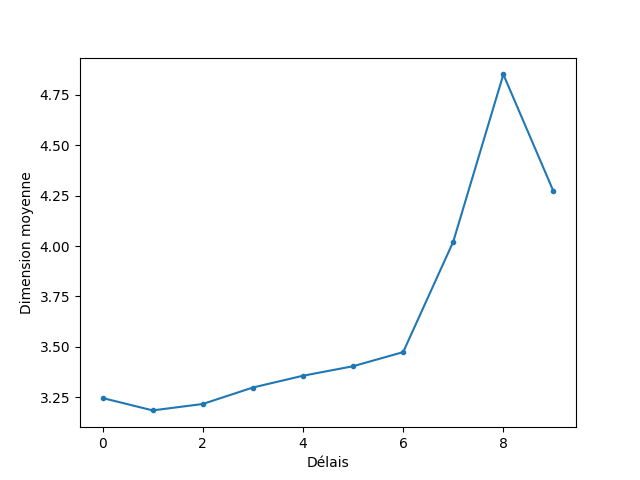

Text(0,0.5,'Dimension moyenne')

In [6]:
plt.figure()
plt.plot(anal_data[anal_data.converges].groupby(['time_delay']).mean()['dimension'],'.-')
plt.xlabel('Délais')
plt.ylabel('Dimension moyenne')

In [7]:
mat = anal_data[anal_data.random_seed == 1]['train_output'].as_matrix()
mat = np.stack(mat)

<IPython.core.display.Javascript object>


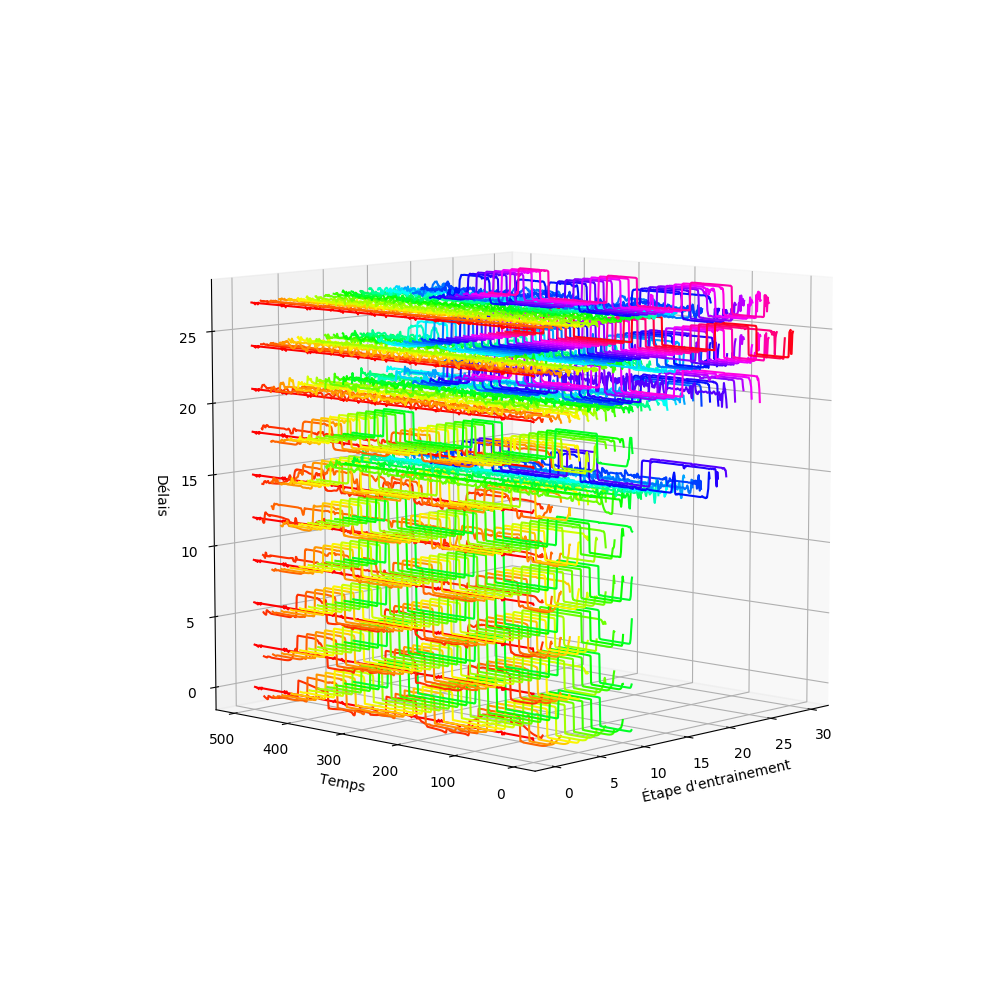

Text(0.5,0,'Délais')

In [11]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for j in range(10):
    for i in range(mat.shape[1]):
        if not np.all(mat[j,i,:,1]==0):
            ax.plot(np.ones(mat.shape[2])*i,np.arange(mat.shape[2]),mat[j,i,:,1]+(3*j),color=plt.cm.hsv(i/30))
ax.set_xlabel('Étape d\'entrainement')
ax.set_ylabel('Temps')
ax.set_zlabel('Délais')

In [9]:
corr_img = np.zeros((100*4,12,3))
for i in range(10):
    corr_img[0::4,i,0] = np.abs(anal_data[anal_data.random_seed==1][anal_data.time_delay==i]['max_cov_val'].as_matrix()[0][0])
    corr_img[1::4,i,1] = np.abs(anal_data[anal_data.random_seed==1][anal_data.time_delay==i]['max_cov_val'].as_matrix()[0][1])
    corr_img[2::4,i,2] = np.abs(anal_data[anal_data.random_seed==1][anal_data.time_delay==i]['max_cov_val'].as_matrix()[0][2])
    corr_img[3::4,i,:] = 1

data_file = pd.HDFStore('/opt/DATA/RNN.h5')
group = data_file.get_node('RNN_seed_1_delay_0')
table = group.final_weights.read()
win = table['win'][0]
data_file.close()

corr_img[:,10,:] = 1

corr_img[0::4,11,0] = win[0,:]/(np.max(abs(win)))
corr_img[1::4,11,1] = win[1,:]/(np.max(abs(win)))
corr_img[2::4,11,2] = win[2,:]/(np.max(abs(win)))
corr_img[3::4,11,:] = 1

/opt/Python/Python-3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/Python/Python-3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/opt/Python/Python-3.6.5/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


<IPython.core.display.Javascript object>


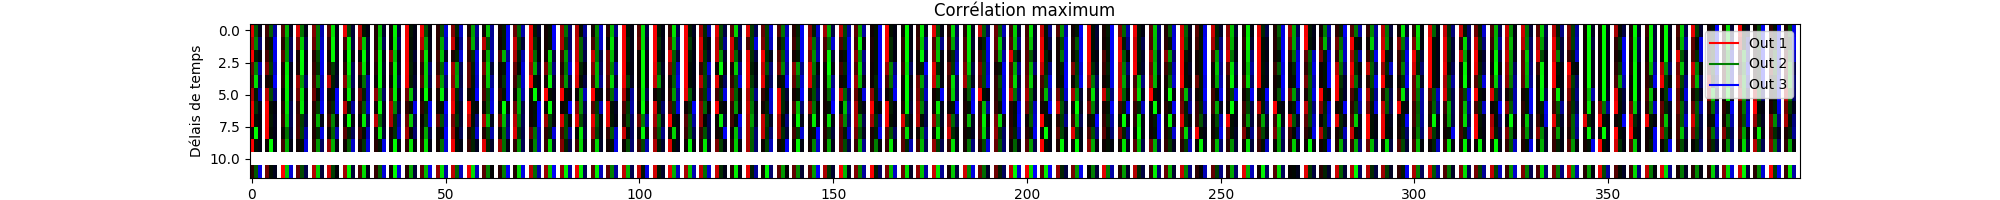

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [10]:
fig, ax = plt.subplots(figsize=(20,2))
plt.imshow(np.swapaxes(abs(corr_img),0,1),aspect='auto')
plt.title('Corrélation maximum')
plt.xlabel('# de neurone')
plt.ylabel('Délais de temps')
custom_legend = [
        Line2D([0], [0], color = 'r', label = 'Out 1'),
        Line2D([0], [0], color = 'g', label = 'Out 2'),
        Line2D([0], [0], color = 'b', label = 'Out 3'),
]
ax.legend(handles = custom_legend)